## CREDIT CARD FRAUD DETECTION

<b>Importing the necessary libraries!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

from sklearn.metrics import silhouette_score, classification_report, accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

rand_state = 100

    Import the data!

In [2]:
data = pd.read_csv('creditcard.csv')

print(data.shape, '\n')

data.head()

(284807, 31) 



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<b>    Exploratory Data Analysis!

In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
[[i, data[i].dtype] for i in data.columns]

[['Time', dtype('float64')],
 ['V1', dtype('float64')],
 ['V2', dtype('float64')],
 ['V3', dtype('float64')],
 ['V4', dtype('float64')],
 ['V5', dtype('float64')],
 ['V6', dtype('float64')],
 ['V7', dtype('float64')],
 ['V8', dtype('float64')],
 ['V9', dtype('float64')],
 ['V10', dtype('float64')],
 ['V11', dtype('float64')],
 ['V12', dtype('float64')],
 ['V13', dtype('float64')],
 ['V14', dtype('float64')],
 ['V15', dtype('float64')],
 ['V16', dtype('float64')],
 ['V17', dtype('float64')],
 ['V18', dtype('float64')],
 ['V19', dtype('float64')],
 ['V20', dtype('float64')],
 ['V21', dtype('float64')],
 ['V22', dtype('float64')],
 ['V23', dtype('float64')],
 ['V24', dtype('float64')],
 ['V25', dtype('float64')],
 ['V26', dtype('float64')],
 ['V27', dtype('float64')],
 ['V28', dtype('float64')],
 ['Amount', dtype('float64')],
 ['Class', dtype('int64')]]

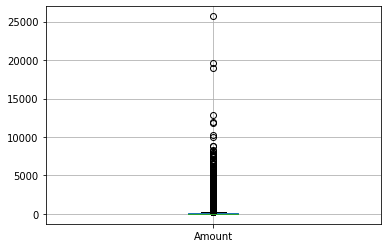

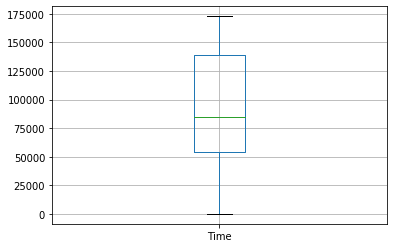

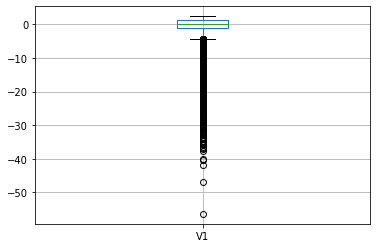

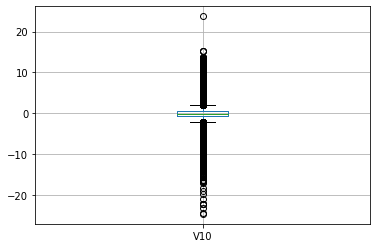

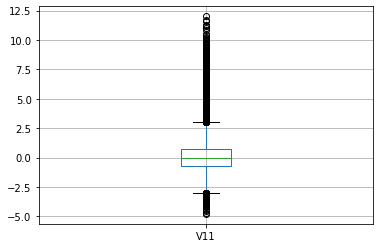

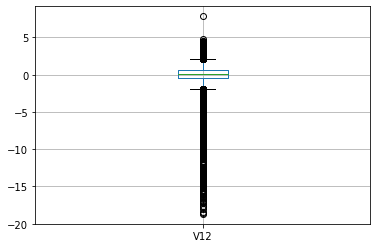

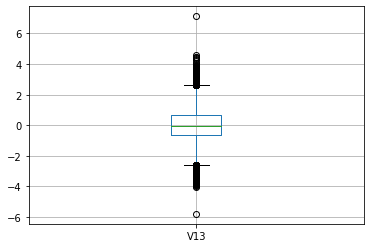

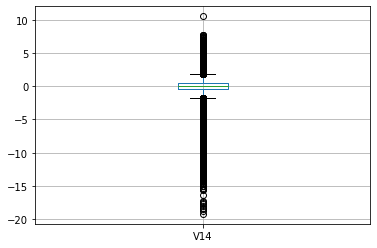

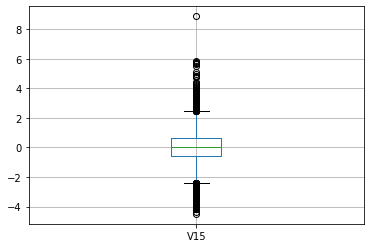

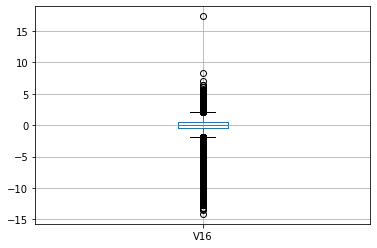

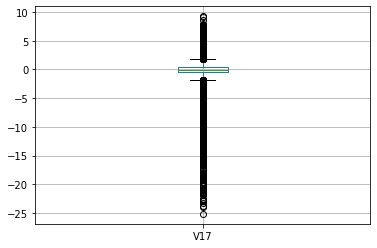

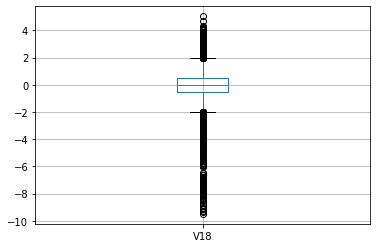

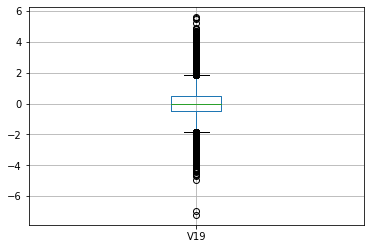

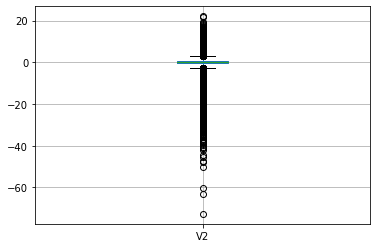

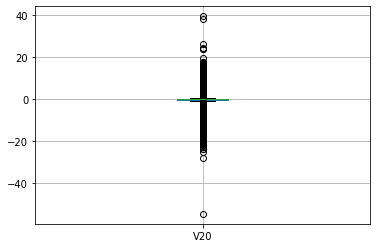

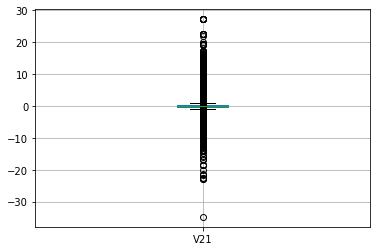

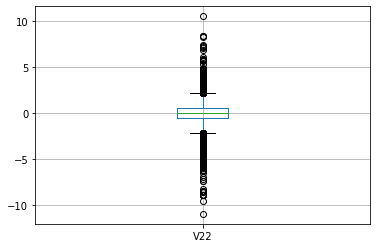

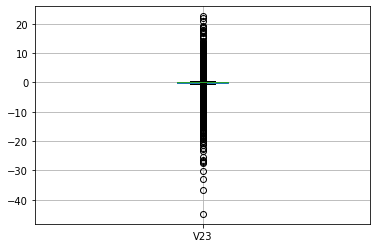

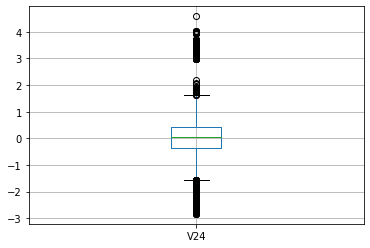

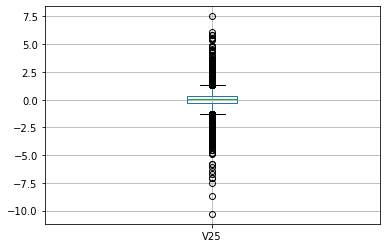

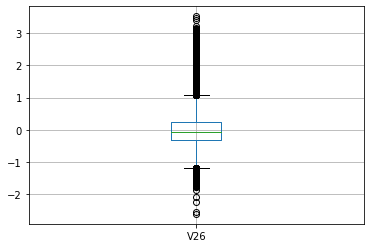

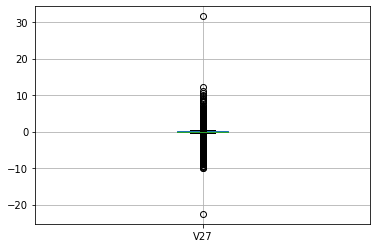

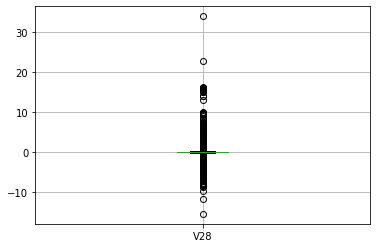

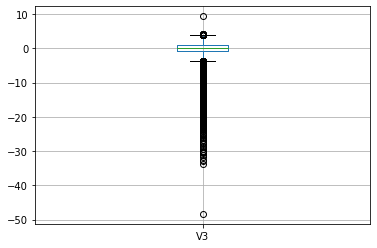

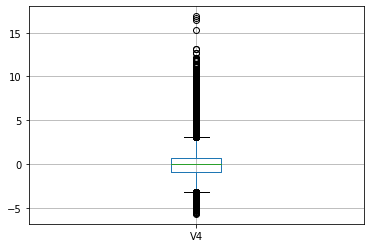

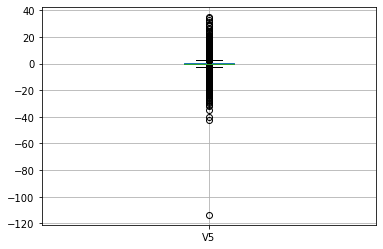

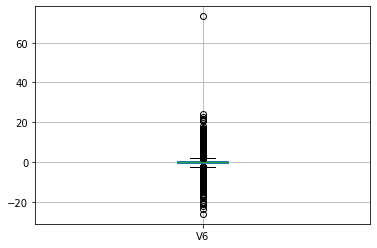

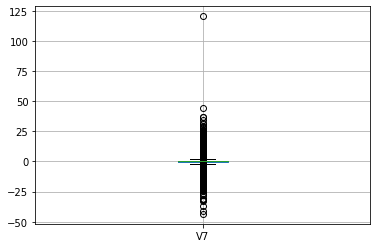

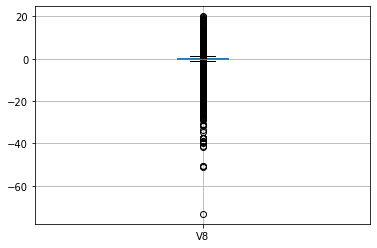

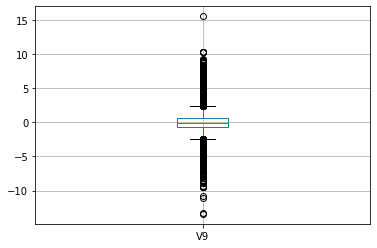

In [5]:
def box(df):
    numerical_cols = df.columns.difference(['Class']).tolist()
    for i in df.loc[:,numerical_cols]:
        df.boxplot(i)
        plt.show()
        
box(data)

Almost all the columns have outliers & hence, we will proceed without outlier treatment

Histogram of : Time


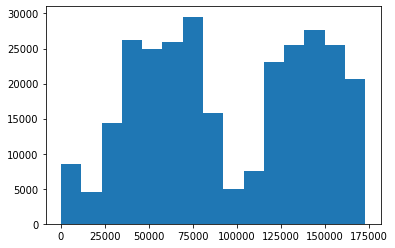

Histogram of : V1


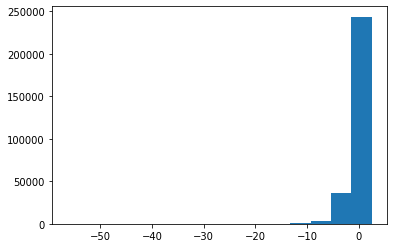

Histogram of : V2


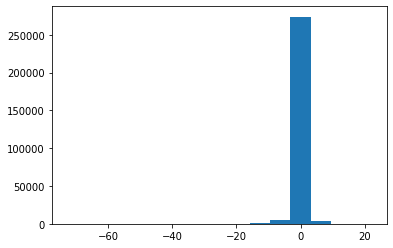

Histogram of : V3


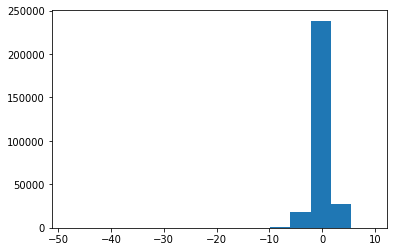

Histogram of : V4


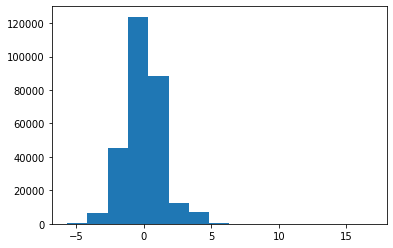

Histogram of : V5


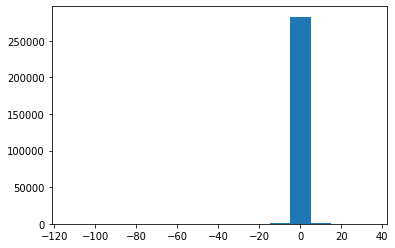

Histogram of : V6


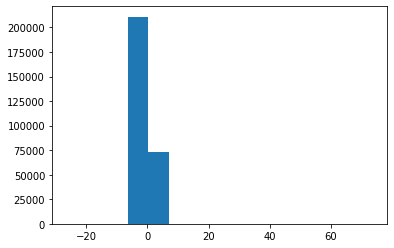

Histogram of : V7


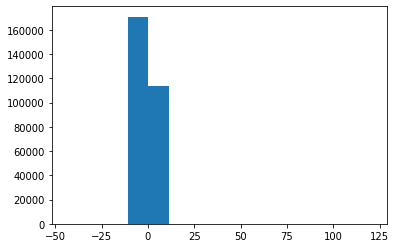

Histogram of : V8


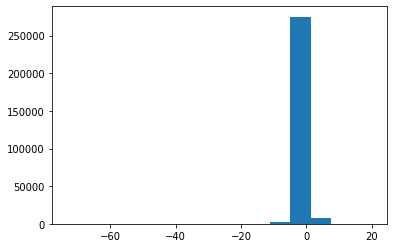

Histogram of : V9


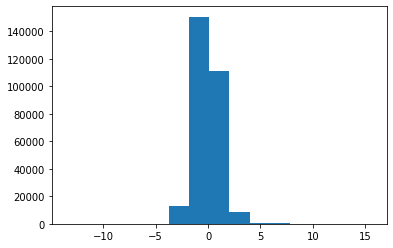

Histogram of : V10


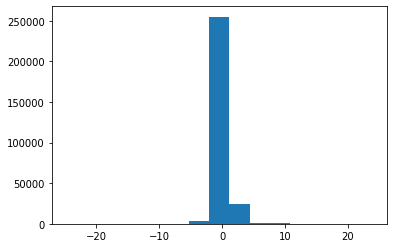

Histogram of : V11


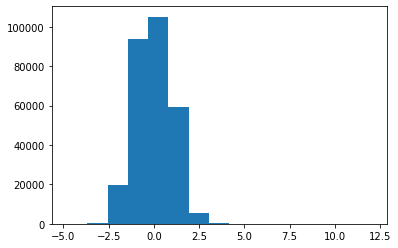

Histogram of : V12


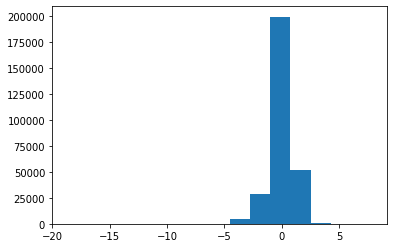

Histogram of : V13


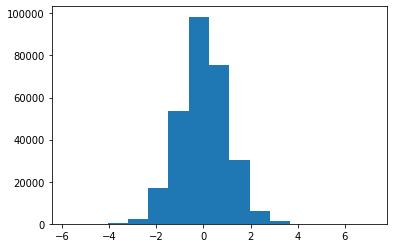

Histogram of : V14


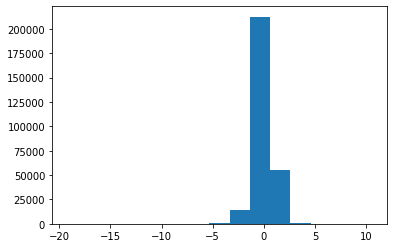

Histogram of : V15


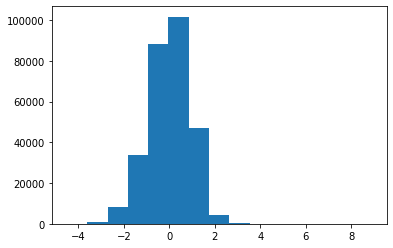

Histogram of : V16


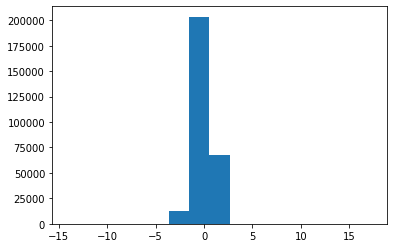

Histogram of : V17


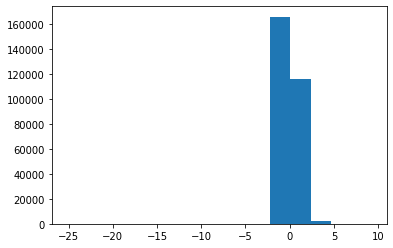

Histogram of : V18


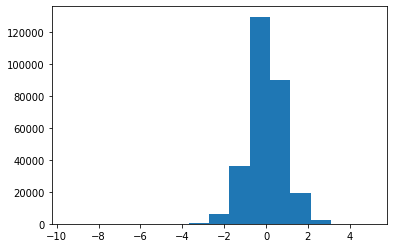

Histogram of : V19


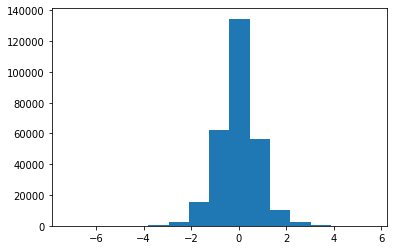

Histogram of : V20


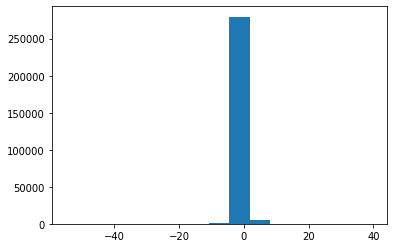

Histogram of : V21


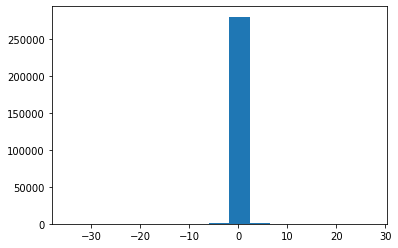

Histogram of : V22


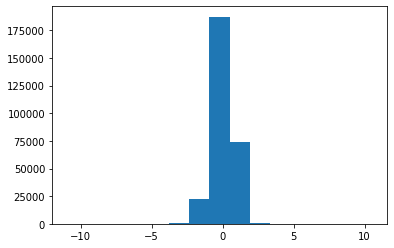

Histogram of : V23


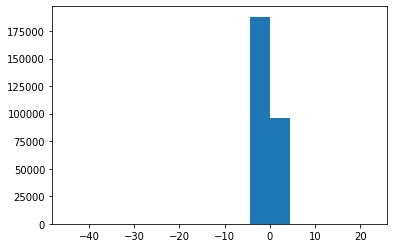

Histogram of : V24


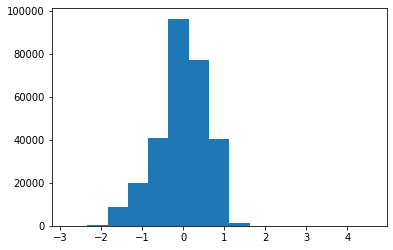

Histogram of : V25


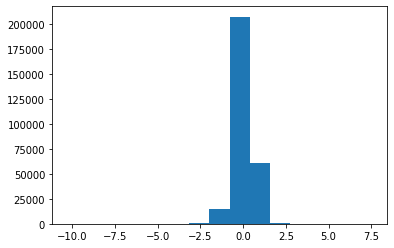

Histogram of : V26


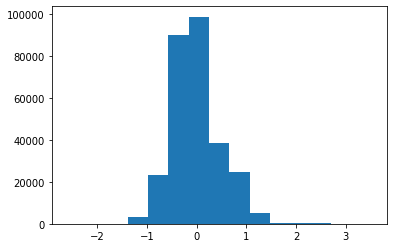

Histogram of : V27


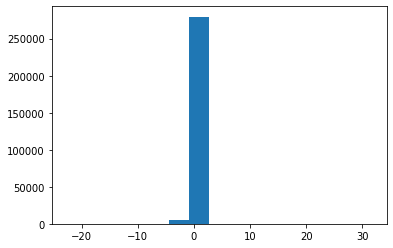

Histogram of : V28


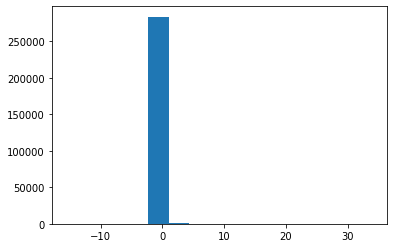

Histogram of : Amount


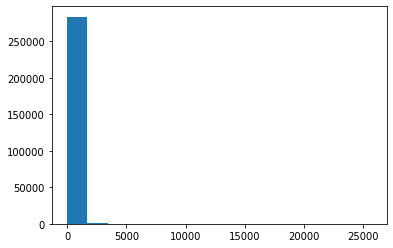

In [6]:
def plot_vars(df):
    for i in df.columns[:30]:
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print('Histogram of :',i)
            plt.hist(df[i],bins=15)
            plt.show()
        else:
            print('Bar graph of :',i)
            plt.bar(df[i].unique().tolist(),df[i].value_counts().tolist())
            plt.show()
            
plot_vars(data)

<b>Outlier Analysis

In [7]:
def outlier(col):
    
    q75, q25 = np.percentile(col, [75,25])
    
    iqr = q75 - q25
        
    outlier_left = q25 - 1.5*iqr
    
    outlier_right = q75 + 1.5*iqr
    
    return (outlier_left, outlier_right)



def outlier_analysis(ls):

    lower = outlier(data[ls])[0]
    upper = outlier(data[ls])[1]

    print(ls)
    print('Suspected outliers :')
    print( data[(data[ls] < lower) | (data[ls] > upper )].shape ,'\n')

    print( data[ (data[ls] < lower) | (data[ls] > upper) ]['Class'].value_counts() / \
          data['Class'].value_counts() *100 )
    print('\n')

    print('Regular observations :')
    print( data[(data[ls] > lower) & (data[ls] < upper )].shape ,'\n')

    print( data[(data[ls] > lower) & (data[ls] < upper)]['Class'].value_counts() / \
          data['Class'].value_counts() *100 )

    print('\n\n')

for i in data.columns.difference(['Class']).tolist():
    outlier_analysis( i ) 

Amount
Suspected outliers :
(31904, 31) 

0    11.189350
1    18.495935
Name: Class, dtype: float64


Regular observations :
(252903, 31) 

0    88.810650
1    81.504065
Name: Class, dtype: float64



Time
Suspected outliers :
(0, 31) 

0   NaN
1   NaN
Name: Class, dtype: float64


Regular observations :
(284807, 31) 

0    100.0
1    100.0
Name: Class, dtype: float64



V1
Suspected outliers :
(7062, 31) 

0     2.422665
1    35.365854
Name: Class, dtype: float64


Regular observations :
(277745, 31) 

0    97.577335
1    64.634146
Name: Class, dtype: float64



V10
Suspected outliers :
(9496, 31) 

0     3.199620
1    81.097561
Name: Class, dtype: float64


Regular observations :
(275311, 31) 

0    96.800380
1    18.902439
Name: Class, dtype: float64



V11
Suspected outliers :
(780, 31) 

0     0.170937
1    59.756098
Name: Class, dtype: float64


Regular observations :
(284027, 31) 

0    99.829063
1    40.243902
Name: Class, dtype: float64



V12
Suspected outliers :
(15348, 31) 

Features that can have meaningful outliers (as they could bring additional predictive power):
    Amount, V1, V10*, V11*, V12, V14, V16, V17, V18, V19, V2, V20, V21, V23, V27, V28, V3, V4, V5, V6, V7, V8, V9.
    
Don't: V13, V15, V22, V24, V25, V26.

In [8]:
treat = ['V13', 'V15', 'V22', 'V24', 'V25', 'V26']
treat

['V13', 'V15', 'V22', 'V24', 'V25', 'V26']

In [9]:
cd = data.copy()

for i in treat:
    
    q75, q25 = np.percentile( cd[i], [75,25] )
    
    lower = outlier(data[i])[0]
    upper = outlier(data[i])[1]
#     print(upper, lower)
    
    cd.ix[cd[i] > upper, i] = q75 
    cd.ix[cd[i] < lower, i] = q25

<b>Clustering to check if the two form good clusters:

In [10]:
clust_data = data.copy()

cd = clust_data.drop(columns='Class')
cd = minmax_scale(cd)

K = KMeans(n_clusters=2).fit_predict(cd)
# K.labels_

In [11]:
# silhouette_score(cd, K, random_state = rand_state)

print('Silhoutte score is : ',0.4172)

Silhoutte score is :  0.4172


In [12]:
cd = data.copy()

cd['Clust'] = K

print( cd[cd['Clust'] == 1]['Class'].value_counts()/cd['Class'].value_counts() *100 )

cd[cd['Clust'] == 0]['Class'].value_counts()/ cd['Class'].value_counts()*100

0    46.307441
1    32.113821
Name: Class, dtype: float64


0    53.692559
1    67.886179
Name: Class, dtype: float64

 The silhoutte score of the clustering done is approx. 0.4 which means the two clusters are fairly separated. But after checking them against the labels, we see that clustering hasn't been done according to the labels that the data has. This could mean that our data can probably be non-linearly separated.

<b>Correlation analysis

In [13]:
def show_unimp_vars(df,max_corr):

    dfq = df.corr()

    corr = []

    for ind,row in dfq.iterrows():
        for i in row.index.tolist():
            if ind != i and abs(row[i]) > max_corr:
                if (i,ind) in corr:
                    continue
                else:
                    corr.append((ind,i))
    
    return corr


corr_list = show_unimp_vars(data, max_corr = 0.6)
corr_list

[]

<b>Baseline model:

In [14]:
def preprocessing_X(df):  
    
    X_ = df.copy()
    
    X_.drop(columns=['Class'],inplace=True)
    
    from sklearn.preprocessing import MinMaxScaler

    STS = MinMaxScaler()

    X_[X_.select_dtypes(['int64','float64']).columns.tolist()] = STS.fit_transform(X_[X_.select_dtypes(['int64','float64']).columns.tolist()])
    
    return X_

X = preprocessing_X(data)

In [15]:
y = data['Class']

In [23]:
def model_built(X1,y1, test_ratio, algo):
    
    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio)

    model1 = LogisticRegressionCV(solver='liblinear', cv=3, Cs=[0.1,1,10]).fit(X_train,y_train)
        
    model2 = DecisionTreeClassifier(max_depth=6, random_state = rand_state).fit(X_train,y_train)
    
    model3 = RandomForestClassifier(n_estimators=250, max_depth=5,\
                                    random_state=rand_state, n_jobs=-1).fit(X_train,y_train)
    
    model4 = XGBClassifier(max_depth=5, n_estimators= 50, n_jobs=-1).fit(X_train,y_train)
    
    return model1, model2, model3, model4, X_train, X_test, y_train, y_test

In [24]:
def performance(y_tn, y_pred_tn, y_ts, y_pred_ts):

    print('----------------------------------------------------------')
    
    print('Training accuracy :', accuracy_score(y_tn, y_pred_tn))
    print('Test accuracy :', accuracy_score(y_ts, y_pred_ts))
    
    print('----------------------------------------------------------')
    
    print('Training accuracy :')
    print( classification_report(y_tn, y_pred_tn) )
    print('\n')
    print('Test accuracy :')
    print( classification_report(y_ts, y_pred_ts) ) 
    
    print('----------------------------------------------------------')
    
    print('Training ROC-AUC :', roc_auc_score(y_tn, y_pred_tn))
    print('\n')
    print('Test ROC-AUC :', roc_auc_score(y_ts, y_pred_ts))
    
    print('----------------------------------------------------------')

In [25]:
LR, DT, RD, XG, X_train, X_test, y_train, y_test = model_built(X, y, 0.25, 'LR')

In [26]:
y_lr_train = LR.predict(X_train)

y_lr_test = LR.predict(X_test)

performance(y_train, y_lr_train, y_test, y_lr_test)

----------------------------------------------------------
Training accuracy : 0.999190093864844
Test accuracy : 0.9989607033510295
----------------------------------------------------------
Training accuracy :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213260
           1       0.88      0.58      0.70       345

    accuracy                           1.00    213605
   macro avg       0.94      0.79      0.85    213605
weighted avg       1.00      1.00      1.00    213605



Test accuracy :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.87      0.59      0.70       147

    accuracy                           1.00     71202
   macro avg       0.93      0.79      0.85     71202
weighted avg       1.00      1.00      1.00     71202

----------------------------------------------------------
Training ROC-AUC : 0.7883424940910394


Test ROC-AUC : 0.7

In [27]:
y_dt_train = DT.predict(X_train)

y_dt_test = DT.predict(X_test)

performance(y_train, y_dt_train, y_test, y_dt_test)

----------------------------------------------------------
Training accuracy : 0.9996957000070223
Test accuracy : 0.9993539507317211
----------------------------------------------------------
Training accuracy :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213260
           1       0.98      0.83      0.90       345

    accuracy                           1.00    213605
   macro avg       0.99      0.91      0.95    213605
weighted avg       1.00      1.00      1.00    213605



Test accuracy :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.88      0.80      0.84       147

    accuracy                           1.00     71202
   macro avg       0.94      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202

----------------------------------------------------------
Training ROC-AUC : 0.9144786862875418


Test ROC-AUC : 0.

In [28]:
y_rf_train = RD.predict(X_train)

y_rf_test = RD.predict(X_test)

performance(y_train, y_rf_train, y_test, y_rf_test)

----------------------------------------------------------
Training accuracy : 0.9995552538564172
Test accuracy : 0.9993258616331002
----------------------------------------------------------
Training accuracy :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213260
           1       0.96      0.75      0.85       345

    accuracy                           1.00    213605
   macro avg       0.98      0.88      0.92    213605
weighted avg       1.00      1.00      1.00    213605



Test accuracy :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.95      0.71      0.81       147

    accuracy                           1.00     71202
   macro avg       0.97      0.86      0.91     71202
weighted avg       1.00      1.00      1.00     71202

----------------------------------------------------------
Training ROC-AUC : 0.8767881486434875


Test ROC-AUC : 0.

In [29]:
y_xg_train = XG.predict(X_train)

y_xg_test = XG.predict(X_test)

performance(y_train, y_xg_train, y_test, y_xg_test)

----------------------------------------------------------
Training accuracy : 0.9997331523138503
Test accuracy : 0.9994663071262043
----------------------------------------------------------
Training accuracy :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213260
           1       0.99      0.84      0.91       345

    accuracy                           1.00    213605
   macro avg       1.00      0.92      0.96    213605
weighted avg       1.00      1.00      1.00    213605



Test accuracy :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71055
           1       0.94      0.79      0.86       147

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

----------------------------------------------------------
Training ROC-AUC : 0.9202851659605815


Test ROC-AUC : 0.